In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv(r'C:\Users\AmiteshOP\Downloads\titanic-data.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['family'] = df['SibSp'] + df['Parch']

In [6]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [13]:
df=df[['Age','Fare','family','Survived']]

In [14]:
df.head(3)

,Age,Fare,family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [16]:
df.isnull().mean()*100

Age         19.86532
Fare         0.00000
family       0.00000
Survived     0.00000
dtype: float64

In [18]:
y=df['Survived']
X = df.drop('Survived',axis=1)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
X_test.isnull().mean()

Age       0.162011
Fare      0.000000
family    0.000000
dtype: float64

In [22]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

X_train['mean_age']= X_train['Age'].fillna(mean_age)
X_train['medain_age']= X_train['Age'].fillna(median_age)

In [23]:
X_train.head(2)

,Age,Fare,family,mean_age,medain_age
30,40.0,27.7208,0,40.0,40.0
10,4.0,16.7000,2,4.0,4.0


In [25]:
print('orignal age variable variance',X_train['Age'].var())
print('age variance after mean imputation',X_train['mean_age'].var())
print('age variance after median imputation',X_train['medain_age'].var())

orignal age variable variance 204.3495133904614
age variance after mean imputation 161.81262452718673
age variance after median imputation 161.9895663346054


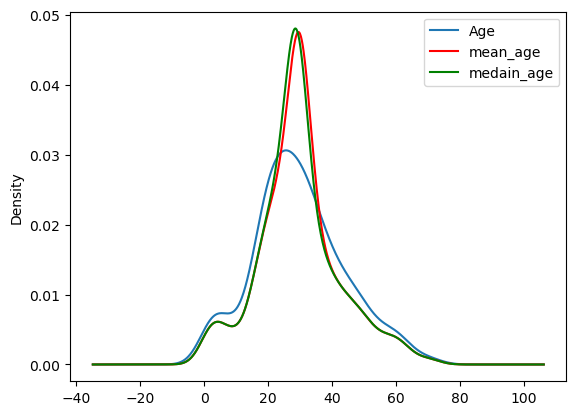

In [33]:
fig =plt.figure()
ax= fig.add_subplot(111)

# orignal variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the mean
X_train['mean_age'].plot(kind='kde',ax=ax,color='red')

# variable imputed with median
X_train['medain_age'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best');


In [34]:
X_train.cov()

,Age,Fare,family,mean_age,medain_age
Age,204.349513,71.512440,-6.498901,204.349513,204.349513
Fare,71.512440,2368.246832,16.847264,56.626587,58.986531
family,-6.498901,16.847264,2.735252,-5.146106,-5.112563
mean_age,204.349513,56.626587,-5.146106,161.812625,161.812625
medain_age,204.349513,58.986531,-5.112563,161.812625,161.989566


In [51]:
X_train.corr()

,Age,Fare,family,mean_age,medain_age
Age,1.000000,0.095814,-0.299113,1.000000,1.000000
Fare,0.095814,1.000000,0.209323,0.091475,0.095235
family,-0.299113,0.209323,1.000000,-0.244610,-0.242883
mean_age,1.000000,0.091475,-0.244610,1.000000,0.999454
medain_age,1.000000,0.095235,-0.242883,0.999454,1.000000


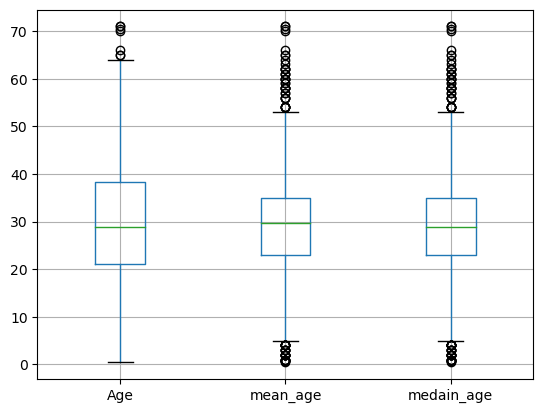

In [54]:
X_train[['Age','mean_age','medain_age']].boxplot();